# **Building a CNN model for classification of Flowers**

# **Load the dataset**

In [ ]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  infla

In [ ]:
#importing required libraries to build a CNN classification model with accuracy

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
batch_size = 32
img_height = 180
img_width = 180
data_dir = "/content/flowers"

# **Image Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

In [ ]:
x_train = train_datagen.flow_from_directory(r"/content/flowers", target_size = (64,64) , class_mode = "categorical", batch_size = 100)

Found 4317 images belonging to 5 classes.


In [ ]:
#Image Augumentation accuracy
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

# **Model Building and also Split dataset into training and testing sets**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


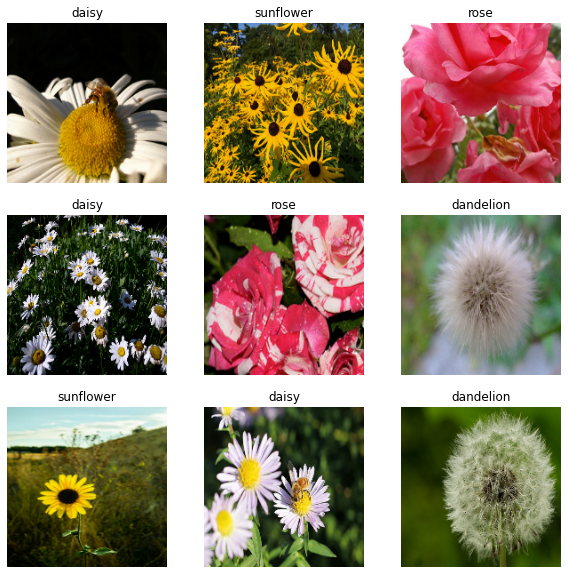

In [88]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# **Adding the layers (Convolution,MaxPooling,Flatten,Dense-(HiddenLayers),Output)**

In [ ]:
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu")) #mulitple dense layers
model.add(Dense(5, activation = "softmax")) #output layer

In [ ]:
#Adding the layers for accuracy
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# **Compile The Model**

In [ ]:
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")
len(x_train)

44

In [ ]:
#Compile the model for further accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
108/108 [==============================] - 132s 1s/step - loss: 1.2821 - accuracy: 0.4537 - val_loss: 1.0988 - val_accuracy: 0.5458
Epoch 2/10
108/108 [==============================] - 130s 1s/step - loss: 1.0298 - accuracy: 0.5921 - val_loss: 0.9494 - val_accuracy: 0.6304
Epoch 3/10
108/108 [==============================] - 129s 1s/step - loss: 0.9274 - accuracy: 0.6448 - val_loss: 0.9927 - val_accuracy: 0.6130
Epoch 4/10
108/108 [==============================] - 129s 1s/step - loss: 0.9000 - accuracy: 0.6642 - val_loss: 0.9264 - val_accuracy: 0.6419
Epoch 5/10
108/108 [==============================] - 136s 1s/step - loss: 0.8432 - accuracy: 0.6778 - val_loss: 0.8499 - val_accuracy: 0.6674
Epoch 6/10
108/108 [==============================] - 130s 1s/step - loss: 0.8166 - accuracy: 0.6888 - val_loss: 0.8714 - val_accuracy: 0.6732
Epoch 7/10
108/108 [==============================] - 130s 1s/step - loss: 0.7726 - accuracy: 0.7064 - val_loss: 0.7873 - val_accuracy: 0.6895

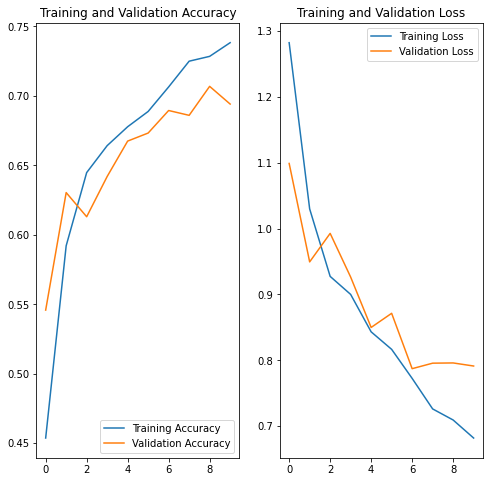

In [ ]:
#To find the Training and Validation- Accuracy & Loss (Visualization)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#**Fit The Model** 

In [ ]:
model.fit(x_train, epochs = 15, steps_per_epoch = len(x_train))

Epoch 1/15
44/44 [==============================] - 31s 684ms/step - loss: 1.7914 - accuracy: 0.3588
Epoch 2/15
44/44 [==============================] - 29s 648ms/step - loss: 1.1730 - accuracy: 0.5045
Epoch 3/15
44/44 [==============================] - 29s 650ms/step - loss: 1.0967 - accuracy: 0.5529
Epoch 4/15
44/44 [==============================] - 29s 648ms/step - loss: 1.0351 - accuracy: 0.5939
Epoch 5/15
44/44 [==============================] - 29s 645ms/step - loss: 0.9920 - accuracy: 0.6127
Epoch 6/15
44/44 [==============================] - 30s 677ms/step - loss: 0.9659 - accuracy: 0.6259
Epoch 7/15
44/44 [==============================] - 29s 648ms/step - loss: 0.9129 - accuracy: 0.6426
Epoch 8/15
44/44 [==============================] - 29s 647ms/step - loss: 0.9085 - accuracy: 0.6433
Epoch 9/15
44/44 [==============================] - 32s 717ms/step - loss: 0.8597 - accuracy: 0.6620
Epoch 10/15
44/44 [==============================] - 30s 674ms/step - loss: 0.8350 - accura

# **Save The Model**

In [ ]:
model.save("flowers.h1")

In [ ]:
model.save("flowers.m5")#another model to show the accuracy

# **Test The Model**

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model = load_model("/content/flowers.h1")

In [84]:
#Testing with a random rose image from Google

img = image.load_img("/content/lotus.jfif", target_size = (240,240) )

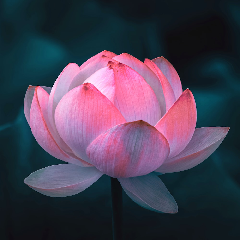

In [85]:
img

In [ ]:
x = image.img_to_array(img)
x.ndim

3

In [ ]:
x = np.expand_dims(x,axis = 0)
x.ndim

4

In [ ]:
pred = model.predict(x)
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
labels = ['daisy','dandelion','roses','sunflowers','tulips']

In [ ]:
labels[np.argmax(pred)]

'roses'

In [ ]:
#Testing the alternative model with accuracy

sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

131072/117948 [=================================] - 0s 0us/step
This image most likely belongs to sunflower with a 99.85 percent confidence.
